In [1]:
import pandas as pd  # for easily manipulating databases
import numpy as np  # for numerical computations
import matplotlib.pyplot as plt  # for plotting

# Load the dataset and explore

The diabetes dataset contains 11 measurements from a cohort of N = 442 patients with diabetes, and we are most interested in the column labeled “Y”, which is some clinical measure of disease progression taken one year after the rest of the measurements are taken.

So we will want to predict Y from the 10 other variables, which are the predictors.

In [2]:
df = pd.read_csv('./data/diabetes.csv')  # read in the data

print(df.columns) # to see the variable names

Index(['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y'], dtype='object')


array([[<Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'SEX'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'BP'}>, <Axes: title={'center': 'S1'}>,
        <Axes: title={'center': 'S2'}>],
       [<Axes: title={'center': 'S3'}>, <Axes: title={'center': 'S4'}>,
        <Axes: title={'center': 'S5'}>],
       [<Axes: title={'center': 'S6'}>, <Axes: title={'center': 'Y'}>,
        <Axes: >]], dtype=object)

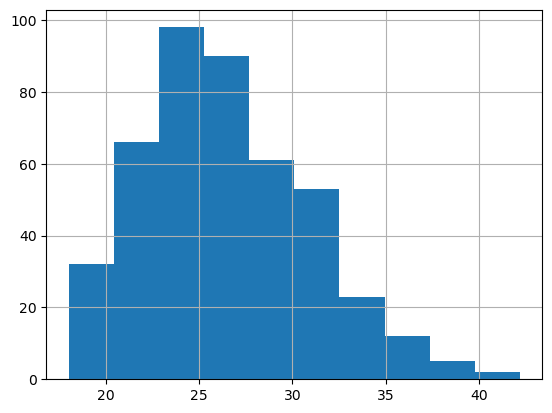

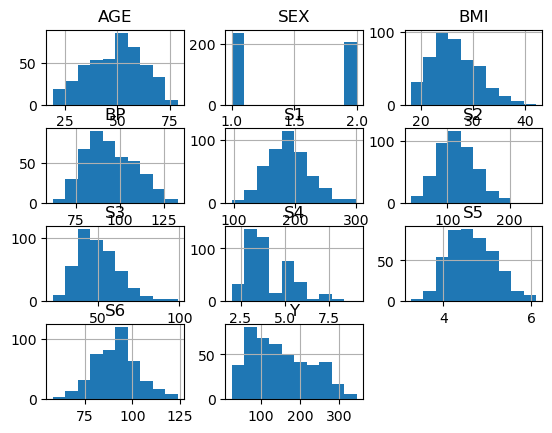

In [3]:
df['BMI'].hist()  # to plot a histogram of the BMI variable
df.hist() # will give you a histogram of every variable
# plt.show() # If you are using IPython instead of Jupyter, use this to see the plot

### Question1:
Which variables are continuous and which are not? 

Sex is not continuous and all other variables are continuous.

### Question 2:
How do we handle the variables that are not continuous in the regression model? 

One hot encode it. 

### Question 3:
'Y' is the target variable. Extract it from the dataframe and create a separate matrix of predictors where any discrete variables are encoded appropriately.

In [4]:
raw_df = pd.read_csv('./data/diabetes.csv')  # read in the data
raw_df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [5]:
y = raw_df['Y']
y.head()

0    151
1     75
2    141
3    206
4    135
Name: Y, dtype: int64

In [6]:
x_ohe = raw_df.copy(deep=True).drop('Y', axis=1)
x_ohe.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


In [7]:
# One-hot encode the 'SEX' column
sex_encoded = pd.get_dummies(x_ohe['SEX'], prefix='SEX', drop_first=True)

# Convert True/False to 1/0
sex_encoded['SEX_2'] = sex_encoded['SEX_2'].astype(int)

# Concatenate the new columns to the original DataFrame
x_ohe = pd.concat([x_ohe, sex_encoded], axis=1)

# Drop the original 'SEX' column if it's no longer needed
x_ohe.drop('SEX', axis=1, inplace=True)

# See the resultant DataFrame
x_ohe.head()

,AGE,BMI,BP,S1,S2,S3,S4,S5,S6,SEX_2
0,59,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,1
1,48,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,0
2,72,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,1
3,24,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,0
4,50,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,0


# Ordinary linear regression with statsmodels

statsmodels is a popular statistic module in Python. We will use it to fit ordinary least squares on the dataset. Run the following code to fit linear regression and print the results. Note that we do not need to re-scale the predictors for least squares (though you can if you want to, as it often helps interpretation.) 

This code assumes you correctly prepared a the data 'Y' and 'X' as instructed above.

In [8]:
import statsmodels.api as sm  # load statsmodels

X_ = sm.add_constant(x_ohe)  # this is how you add a constant term (for the intercept)
display(X_.head())
est = sm.OLS(y, X_).fit()  # fits the least squares estimate
print(est.summary())

,const,AGE,BMI,BP,S1,S2,S3,S4,S5,S6,SEX_2
0,1.0,59,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,1
1,1.0,48,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,0
2,1.0,72,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,1
3,1.0,24,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,0
4,1.0,50,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,0


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Wed, 24 Jan 2024   Prob (F-statistic):           3.83e-62
Time:                        21:49:11   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -357.4268     67.058     -5.330      0.0

/home/zhiming/miniconda3/envs/stat_learning/lib/python3.12/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Figure size 1000x800 with 0 Axes>

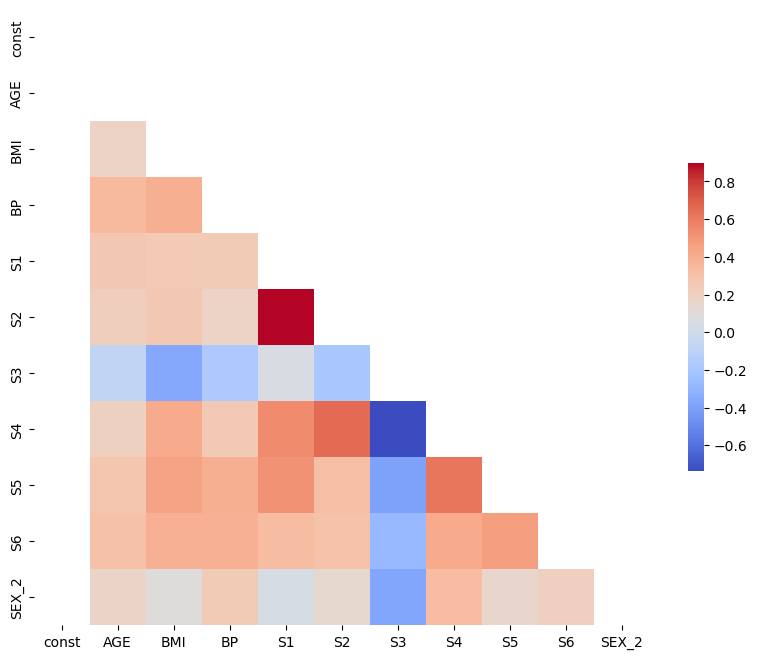

In [9]:
import seaborn as sns
corr_matrix = X_.corr()  # correlation matrix

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Mask the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .5})

# Show the plot
plt.show()

### Question 4:
Identify the coefficient estimates. Which predictors are we quite sure are important for the prediction? (Also, do you see the confidence intervals? What number represents the percentiles of a Gaussian distribution like you learned in lecture?)


Constant, BMI, BP, S5, SEX

# Shrinkage with scikit-learn

In the statsmodels print out, we see it warn us that there is likely strong multicollinearity in the data. We therefore know that we should explore using shrinkage methods.

### Question 5:

Use scikit-learn to compare linear regression, ridge regression, and Lasso on this dataset. You should be using a method like cross validation to compute the average squared prediction error over multiple test sets. (If you do not want to code up K-fold cross validation by hand, instead consider using test sets that are just random subsets of the dataset.)

Consider how you should choose the the penalty parameter \lambda (it would be best to use a validation set approach, where you select \lambda using a method like cross validation using the training data only).

Note that cross validation is being used in two separate ways in this exercise: To select the penalty parameter \lambda, and to compare predictive performance of the models.

Remember that we must standardize the predictors before using ridge regression and Lasso. Below the key functions are provided for you. You should certainly read their documentation to learn more about them.

In [10]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV

"""
lr = LinearRegression(fit_intercept=True).fit(X_train, Y_train)  # Linear regression with an intercept. Do NOT use X_ from statsmodels.
Y_pred = lr.predict(X_test)  # prediction on a test set

ridge = RidgeCV(alphas=np.linspace(0.001, 100.0, 100), fit_intercept=True, cv=10).fit(X_train, Y_train)  # Ridge regression with an intercept. Selects the penalty from among 0.1, 1.0, and 10 using 5-fold cross validation.
Y_pred = ridge.predict(X_test)  # prediction on a test set

lasso = LassoCV(alphas=np.linspace(0.001, 100.0, 100), fit_intercept=True, cv=10).fit(X_train, Y_train)  # Lasso with an intercept. Selects the penalty from among 100 choices linearly space in (0.001, 10) using 10-fold cross validation.
Y_pred = lasso.predict(X_test)  # prediction on a test set
"""


'\nlr = LinearRegression(fit_intercept=True).fit(X_train, Y_train)  # Linear regression with an intercept. Do NOT use X_ from statsmodels.\nY_pred = lr.predict(X_test)  # prediction on a test set\n\nridge = RidgeCV(alphas=np.linspace(0.001, 100.0, 100), fit_intercept=True, cv=10).fit(X_train, Y_train)  # Ridge regression with an intercept. Selects the penalty from among 0.1, 1.0, and 10 using 5-fold cross validation.\nY_pred = ridge.predict(X_test)  # prediction on a test set\n\nlasso = LassoCV(alphas=np.linspace(0.001, 100.0, 100), fit_intercept=True, cv=10).fit(X_train, Y_train)  # Lasso with an intercept. Selects the penalty from among 100 choices linearly space in (0.001, 10) using 10-fold cross validation.\nY_pred = lasso.predict(X_test)  # prediction on a test set\n'

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_wo_sex=X_.drop('SEX_2', axis=1)
X_wo_sex.head()
x_ss = scaler.fit_transform(X_wo_sex)  # scale the data
X_ss = pd.concat[[]]
x_ss = pd.DataFrame(x_ss, columns=X_.columns)  # convert to a DataFrame
# x_ss.head()


ValueError: Shape of passed values is (442, 10), indices imply (442, 11)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x_ss, y, test_size=0.2, random_state=42)  # split the data into training and test sets

In [ ]:
lr = LinearRegression(fit_intercept=True).fit(X_train, Y_train)  # Linear regression with an intercept. Do NOT use X_ from statsmodels.
Y_pred = lr.predict(X_test)  # prediction on a test set

In [ ]:
ridge = RidgeCV(alphas=np.linspace(0.001, 100.0, 100), fit_intercept=True, cv=10).fit(X_train, Y_train)  # Ridge regression with an intercept. Selects the penalty from among 0.1, 1.0, and 10 using 5-fold cross validation.
Y_pred = ridge.predict(X_test)  # prediction on a test set

lasso = LassoCV(alphas=np.linspace(0.001, 100.0, 100), fit_intercept=True, cv=10).fit(X_train, Y_train)  # Lasso with an intercept. Selects the penalty from among 100 choices linearly space in (0.001, 10) using 10-fold cross validation.
Y_pred = lasso.predict(X_test)  # prediction on a test set

### Question 6:
Explore the weights for each of the models by visualizing them (use the documentation to figure out where the coefficients are stored). Is Lasso performing feature selection? 

Yes. Lasso can perform a feature selection.


### Question 7:
Take a look at some penalty parameters that are selected by the RidgeCV and LassoCV methods.

### Question 8:
Many people would just choose the model with the best average metric over the test sets. (Which would you choose in that case?)

But I would like you to consider the *noise* over the test sets. Plot boxplots (look at the plt.boxplot() method) to compare the *populations* of test errors across the methods. Does any method look like it consistently outperforms the others?

Consider running a statistical (hypothesis) test that two of these sets of scores significantly differ. (Use the scipy.stats.ttest_rel() method to run a paired t-test, which tests whether the means of two paired samples differs significantly.)